<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Oriba_ABCXYZ_Matriz_de_Cofunsao_Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# **Matriz de Confusão dos Diferentes Classificadores (CV, AIC, MSE)**
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [13]:
df = pd.read_excel('https://github.com/Rogerio-mack/ABCXYZ/raw/main/oriba_ABCXYZ_results.xlsx')
df = df.drop(columns='ABC.1')

df['ABC_XYZ_CV'] = df['ABC'] + df['CLUSTER_CV']
df['ABC_XYZ_AIC'] = df['ABC'] + df['CLUSTER AIC']
df['ABC_XYZ_MSE'] = df['ABC'] + df['CLUSTER MSE']

df.head()



,Produtos,ABC,CLUSTER_CV,CLUSTER AIC,CLUSTER MSE,ABC_XYZ_CV,ABC_XYZ_AIC,ABC_XYZ_MSE
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,C,X,Z,Z,CX,CZ,CZ
1,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,B,X,Z,Z,BX,BZ,BZ
2,Bermuda Cargo Algodão Orgânico Light Preto,C,X,Z,Z,CX,CZ,CZ
3,Bermuda Cargo Algodão Orgânico Light Verde Oliva,B,X,Z,Z,BX,BZ,BZ
4,Bermuda Chambray Azul,C,Z,X,X,CZ,CX,CX


In [17]:
from sklearn.metrics import confusion_matrix

display( confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_AIC']) )
display( confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_MSE']) )
display( confusion_matrix(df['ABC_XYZ_AIC'], df['ABC_XYZ_MSE']) )

array([[ 0,  1, 19,  0,  0,  0,  0,  0,  0],
       [ 6,  6, 37,  0,  0,  0,  0,  0,  0],
       [ 2,  8, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 50,  0,  0,  0],
       [ 0,  0,  0, 10, 12, 34,  0,  0,  0],
       [ 0,  0,  0,  2, 19, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31],
       [ 0,  0,  0,  0,  0,  0,  2, 11, 34],
       [ 0,  0,  0,  0,  0,  0, 57, 61, 65]])

array([[ 0,  1, 19,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  5, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8, 44,  0,  0,  0],
       [ 0,  0,  0,  7, 18, 31,  0,  0,  0],
       [ 0,  0,  0,  1, 13, 21,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 30],
       [ 0,  0,  0,  0,  0,  0,  6, 10, 31],
       [ 0,  0,  0,  0,  0,  0, 65, 61, 57]])

array([[ 0,  0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  7, 70,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  9,  2,  0,  0,  0],
       [ 0,  0,  0,  2,  9, 22,  0,  0,  0],
       [ 0,  0,  0,  5, 21, 72,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38, 21,  0],
       [ 0,  0,  0,  0,  0,  0, 12, 38, 22],
       [ 0,  0,  0,  0,  0,  0, 22, 12, 96]])

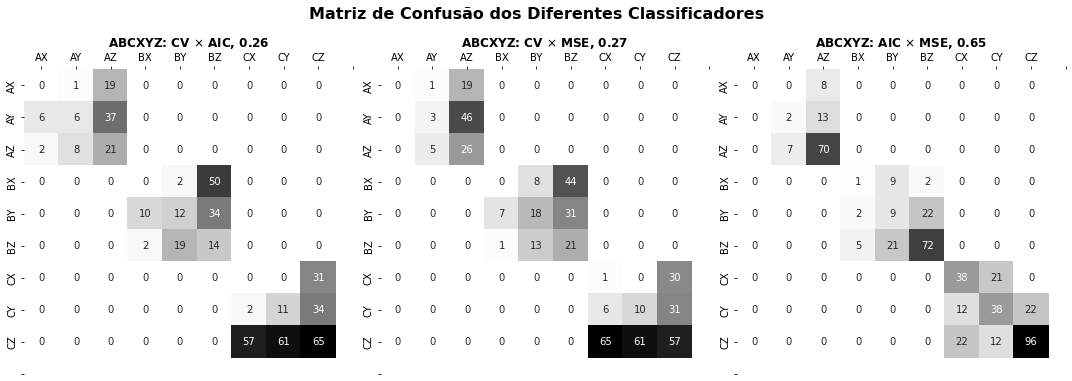

In [93]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ticklabels = ['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']
ticks = np.arange(0.5, 10, 1)

sns.heatmap( confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_AIC']) , cbar=None , annot=True, cmap="gray_r", ax=ax[0], yticklabels=ticklabels, xticklabels=ticklabels)
ax[0].set_yticks(ticks)
ax[0].set_xticks(ticks)
ax[0].xaxis.tick_top()
ax[0].set_title('ABCXYZ: CV $\\times$ AIC, ' + str(np.round( np.trace(np.asarray(confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_AIC']))) / m.sum() ,2 )),
                fontweight="bold",fontsize=12)

sns.heatmap( confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_MSE']) , cbar=None , annot=True, cmap="gray_r", ax=ax[1], yticklabels=ticklabels, xticklabels=ticklabels)
ax[1].set_yticks(ticks)
ax[1].set_xticks(ticks)
ax[1].xaxis.tick_top()
ax[1].set_title('ABCXYZ: CV $\\times$ MSE, ' + str(np.round( np.trace(np.asarray(confusion_matrix(df['ABC_XYZ_CV'], df['ABC_XYZ_MSE']))) / m.sum() ,2 )),
                fontweight="bold",fontsize=12)

sns.heatmap( confusion_matrix(df['ABC_XYZ_AIC'], df['ABC_XYZ_MSE']) , cbar=None , annot=True, cmap="gray_r", ax=ax[2], yticklabels=ticklabels, xticklabels=ticklabels)
ax[2].set_yticks(ticks)
ax[2].set_xticks(ticks)
ax[2].xaxis.tick_top()
ax[2].set_title('ABCXYZ: AIC $\\times$ MSE, ' + str(np.round( np.trace(np.asarray(confusion_matrix(df['ABC_XYZ_AIC'], df['ABC_XYZ_MSE']))) / m.sum() ,2 )),
                fontweight="bold",fontsize=12)

plt.suptitle('Matriz de Confusão dos Diferentes Classificadores',y=1.05,fontweight="bold",fontsize=16)
plt.tight_layout()
plt.show()

In [94]:
fig.savefig('confusion_matrix_abcxyz.png')
from google.colab import files

files.download('confusion_matrix_abcxyz.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>